# I.I Imports

In [1]:
%%capture
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.3

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

# Core ML
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline


# Imputation (MICE-like)
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import SimpleImputer, IterativeImputer

# Imbalanced learning
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

print("pandas version: " + pd.__version__)
print("numpy version: "+ np.__version__)
print("sklearn version" + sklearn.__version__)
print("imbleaern version" + imblearn.__version__)

from lightgbm import LGBMClassifier


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

%matplotlib inline
%config IPCompleter.greedy=True
warnings.filterwarnings('ignore')

pandas version: 2.3.3
numpy version: 1.26.4
sklearn version1.4.2
imbleaern version0.12.3


# I.II Data Audit and Cleaning

In [3]:
Path().mkdir(exist_ok=True, parents=True)

In [4]:
Path.cwd()

PosixPath('/Users/berkcalisir/School&Career/school-docs/Challenge@Stellantis/Challenge-Stellantis---CarGuardians/src')

When loading we replace "na" with null values.

In [5]:
train = pd.read_csv('./dataset/aps_failure_training_set.csv', na_values='na')
test  = pd.read_csv('./dataset/aps_failure_test_set.csv',    na_values='na')

In [6]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [7]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


The dataset has 171 anonymized attributes, where:

- Most columns are continuous numerical sensor readings or counters (e.g., aa_000, bt_000, ci_000, etc.).

- A subset of columns are histogram variables, typically representing binned distributions of sensor activity under varying operating conditions.

In total, there are 7 such histogram families in the APS dataset, corresponding to different subsystems (e.g., compressor, reservoir, valve, etc.).

Treating each bin (ee_000–ee_009) as a separate feature captures the shape of the sensor distribution (e.g., normal vs skewed operation). However, these bins are correlated, since they sum to 1 (or a constant total frequency count).

- Keep all bins if using tree-based models (RF, LGBM) — they handle redundancy well.

- Apply feature engineering for compactness:

    - Compute mean bin index weighted by frequency (center of mass)

    - Compute standard deviation or entropy of the histogram

    - Compute ratios between early vs late bins (to detect drifts or abnormal load)

In [8]:
def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def inspect_duplications(df):
    num_duplicated = len(df[df.duplicated()])
    print(f'STATUS: There are/is {num_duplicated} duplicated rows')
def inspect_null_columns(df, df_name, target=None):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in dataframe "{df_name}"')
    else:
        if target!=None:
            if (df[target].isna().any()):
                print("STATUS: The target class has null values.")
            else:
                print("STATUS: The target class has no null values.")
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            temp[column] = (len(df) - df[column].count())
        print(f"STATUS: {len(columns)} columns with null values, over a total of {len(df.columns)}")
        return pd.DataFrame(temp, index=[0]).T #temp

# replace na to np.na in case it hasn't been replaced earlier while loading the data
train.replace("na", np.nan, inplace=True)
shape(train, 'train_data')
nulls = inspect_null_columns(train,'train','class')
inspect_duplications(train)
train.head()

STATUS: Dimension of "train_data" = (60000, 171)
STATUS: The target class has no null values.
STATUS: 169 columns with null values, over a total of 171
STATUS: There are/is 0 duplicated rows


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
# Normalize target to {0,1}
train["class"] = train["class"].replace({"neg":0, "pos":1})
test["class"]  = test["class"].replace({"neg":0, "pos":1})

In [10]:
# Remove single valued features
def drop_single_valued(df):
    non_const = df.loc[:, df.nunique(dropna=False) > 1]
    removed = [c for c in df.columns if c not in non_const.columns]
    return non_const, removed

In [11]:
train, removed_single_value = drop_single_valued(train)
print(f"Removed single-valued features: {removed_single_value}")

Removed single-valued features: []


In [12]:
# summarize missing ratio visually (heatmap or null % histogram).
nulls_df = nulls.rename(columns = {0:'null values per column'}).sort_values(by = 'null values per column', ascending=False)
nulls_df['percentage of nulls'] = (nulls_df['null values per column'])/len(train)
display(nulls_df)

,null values per column,percentage of nulls
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
...,...,...
by_000,473,0.007883
ci_000,338,0.005633
cj_000,338,0.005633
ck_000,338,0.005633


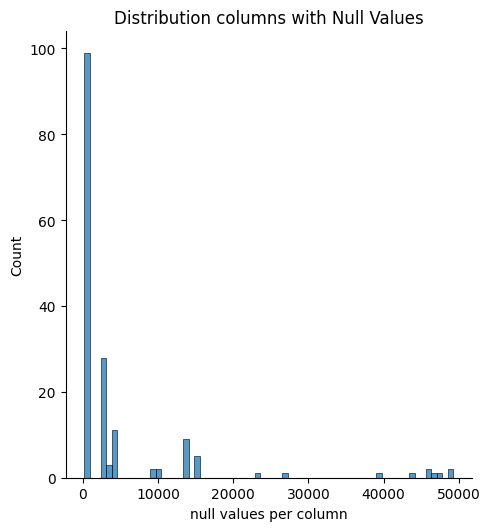

In [13]:
def vis_dist(df, col, lim=False, max_range=None):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution columns with Null Values')
    plt.xlabel(f'{col}')
    if lim:
        plt.xlim(0, max_range)
    return plt.show()
vis_dist(nulls_df, 'null values per column')

In [14]:
def missing_rates(df, exclude_cols=None):
    exclude_cols = set(exclude_cols or [])
    rates = (df.isna().sum() / len(df)).rename("missing_rate").to_frame()
    return rates.loc[[c for c in df.columns if c not in exclude_cols]]

In [15]:
rates = missing_rates(train, exclude_cols=["class"])
# Buckets
high_na_feats   = rates.index[rates["missing_rate"] > 0.70].tolist()
lt4_feats       = rates.index[(rates["missing_rate"] > 0.0) & (rates["missing_rate"] < 0.04)].tolist()
med_4_15_feats  = rates.index[(rates["missing_rate"] >= 0.04) & (rates["missing_rate"] <= 0.15)].tolist()
mice_15_70_feats= rates.index[(rates["missing_rate"] > 0.15) & (rates["missing_rate"] <= 0.70)].tolist()

print(f">70% missing (drop): {len(high_na_feats)}")
print(f"<4% missing (drop rows, train only): {len(lt4_feats)}")
print(f"4–15% missing (median impute): {len(med_4_15_feats)}")
print(f"15–70% missing (MICE): {len(mice_15_70_feats)}")

>70% missing (drop): 7
<4% missing (drop rows, train only): 99
4–15% missing (median impute): 42
15–70% missing (MICE): 21


In [16]:
# We’ll keep a copy of the “removed_features” for test preprocessing
removed_features = high_na_feats.copy()

In [17]:
len(lt4_feats)

99

# I.III Preprocessing

In [18]:
# TRAIN preprocessing (drop feats, then row-drop for <4%, median-impute for 4–15%, MICE for 15–70%)
train_work = train.drop(columns=removed_features)

# a) drop rows with NA in lt4_feats (train only)
if lt4_feats:
    before = len(train_work)
    train_work = train_work.dropna(subset=[c for c in lt4_feats if c in train_work.columns])
    print(f"Dropped {before - len(train_work)} rows due to <4% features")

# b) median imputer for 4–15%
MEDIAN_imputer = None
if med_4_15_feats:
    MEDIAN_imputer = SimpleImputer(strategy="median")
    train_work[med_4_15_feats] = MEDIAN_imputer.fit_transform(train_work[med_4_15_feats])

# c) MICE (IterativeImputer with Ridge) for 15–70%
MICE_imputer = None
if mice_15_70_feats:
    MICE_imputer = IterativeImputer(
        estimator=Ridge(alpha=1.0, random_state=RANDOM_STATE),
        max_iter=10,
        random_state=RANDOM_STATE,
        sample_posterior=False
    )
    train_work[mice_15_70_feats] = MICE_imputer.fit_transform(train_work[mice_15_70_feats])


Dropped 1873 rows due to <4% features


In [19]:
# Split X/y after preprocessing
X_all = train_work.drop(columns=["class"])
y_all = train_work["class"].values

In [20]:
# TEST preprocessing function (
def preprocess_test_data(x, na_features, median_features, imputer_median, imputer_mice):
    x = x.copy()
    x["class"] = x["class"].replace(["neg","pos"], [0,1])
    y = x["class"].values
    x = x.drop(columns=["class"])

    # Drop features with >70% missing (same set from train)
    x = x.drop(columns=[f for f in na_features if f in x.columns])

    # Apply median imputer on the defined subset
    if median_features:
        present = [c for c in median_features if c in x.columns]
        if present:
            x[present] = imputer_median.transform(x[present])

    # Apply MICE imputer on the defined subset
    if imputer_mice is not None:
        # Only transform columns present in training order
        cols = x.columns
        # We fitted imputer on a subset (mice_15_70_feats). We must apply only to those present
        to_mice = [c for c in mice_15_70_feats if c in cols]
        if to_mice:
            x[to_mice] = imputer_mice.transform(x[to_mice])

    return x, y

In [21]:
# Prepare test (no row dropping!)
x_test_pp, y_test = preprocess_test_data(
    test,
    removed_features,
    med_4_15_feats,
    MEDIAN_imputer,
    MICE_imputer
)
print("Shape of Test data:", x_test_pp.shape)

# Align test columns to train columns (in case of column order/availability)
x_test_pp = x_test_pp.reindex(columns=X_all.columns, fill_value=0)

Shape of Test data: (16000, 163)


# I.IV Histogram Families

We end up removing 7 columns

In [22]:
def histogram_families(columns):
    fam = {}
    for c in columns:
        if "_" in c and c[-3:].isdigit() and len(c.split("_")[-1]) == 3:
            prefix = c.split("_")[0]
            fam.setdefault(prefix, []).append(c)
    # keep only families that look like 10 bins (xxx_000..xxx_009)
    return {k: sorted(v) for k, v in fam.items() if len(v) >= 10}

hist_fams = histogram_families(X_all.columns)
# Optionally trim to the canonical 7 (if you’ve pre-verified): ag, ay, az, ba, cn, cs, ee
keep_keys = {"ag","ay","az","ba","cn","cs","ee"}
hist_fams = {k: v for k, v in hist_fams.items() if k in keep_keys}
print({k: (len(v), v[:3], "...") for k,v in hist_fams.items()})


{'ag': (10, ['ag_000', 'ag_001', 'ag_002'], '...'), 'ay': (10, ['ay_000', 'ay_001', 'ay_002'], '...'), 'az': (10, ['az_000', 'az_001', 'az_002'], '...'), 'ba': (10, ['ba_000', 'ba_001', 'ba_002'], '...'), 'cn': (10, ['cn_000', 'cn_001', 'cn_002'], '...'), 'cs': (10, ['cs_000', 'cs_001', 'cs_002'], '...'), 'ee': (10, ['ee_000', 'ee_001', 'ee_002'], '...')}


# I.V Feature selection hooks (RFE on hist-only & on non-hist)

In [23]:
# Feature selection hooks (RFE on hist-only & on non-hist)
# Define hist-only and numeric-only splits for RFE inspection
hist_cols = sorted({c for cols in hist_fams.values() for c in cols})
non_hist_cols = [c for c in X_all.columns if c not in hist_cols]

In [ ]:
# RFE to pick top 15 hist features (on TRAIN only)
def rfe_top_features(X, y, cols, n_features=15):
    if len(cols) <= n_features:
        return cols
    rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
    rfe = RFE(estimator=rf, n_features_to_select=n_features, step=0.1)
    rfe.fit(X[cols], y)
    return list(pd.Index(cols)[rfe.support_])

top15_hist = rfe_top_features(X_all, y_all, hist_cols, n_features=15) if hist_cols else []
top15_num  = rfe_top_features(X_all, y_all, non_hist_cols, n_features=15) if non_hist_cols else []
print("Top15 histogram features:", top15_hist)
print("Top15 numerical features:", top15_num)

# support/correlation matrix for the selected features

Top15 histogram features: ['ag_001', 'ag_002', 'ag_003', 'ag_006', 'ay_005', 'ay_006', 'ay_008', 'az_000', 'ba_000', 'cn_000', 'cn_004', 'cs_002', 'cs_004', 'ee_000', 'ee_005']
Top15 numerical features: ['aa_000', 'al_000', 'am_0', 'ap_000', 'aq_000', 'bb_000', 'bj_000', 'bt_000', 'bu_000', 'bv_000', 'by_000', 'ci_000', 'ck_000', 'cq_000', 'dn_000']


# I.VI Plot PDFs/CDFs/Boxplots for top15 — stubs:


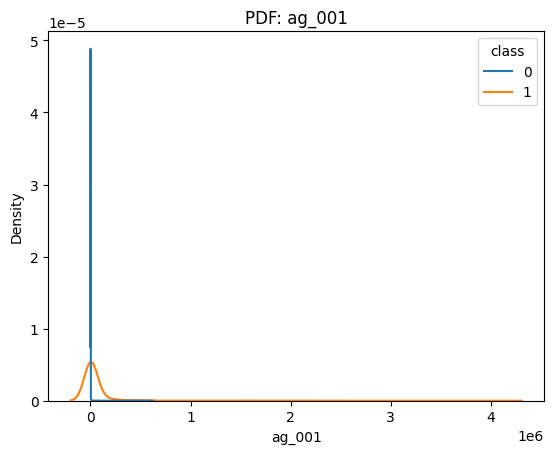

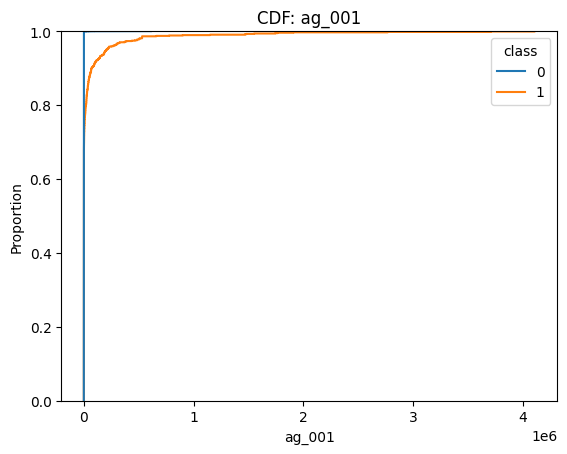

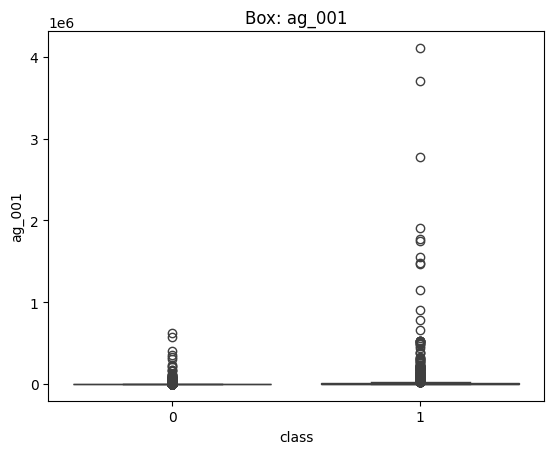

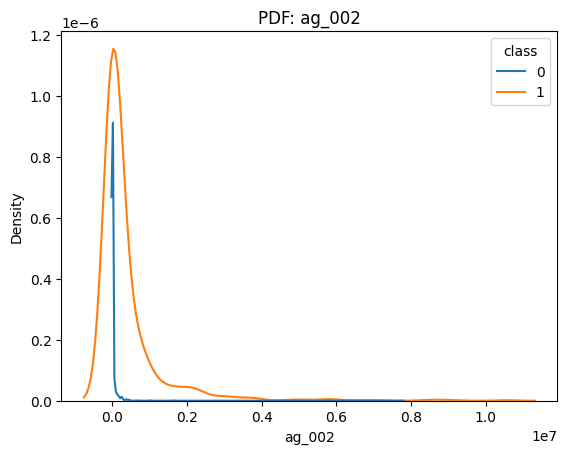

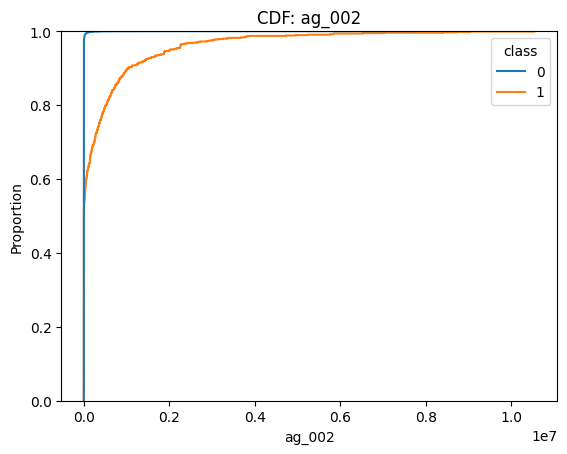

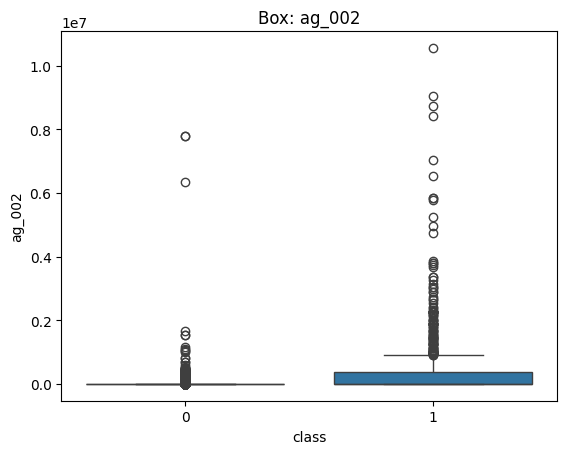

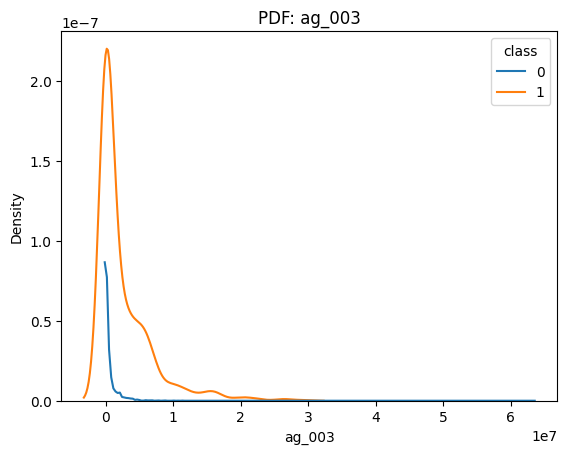

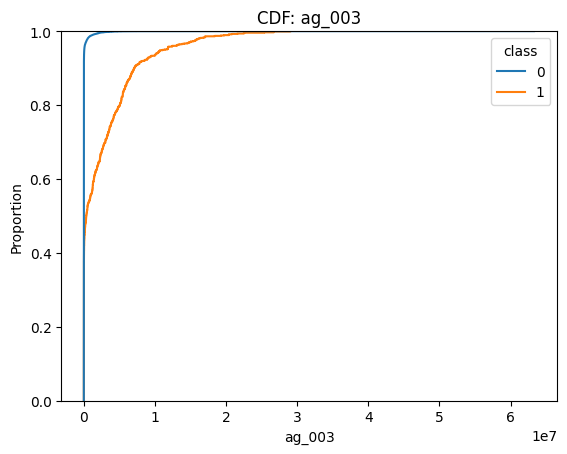

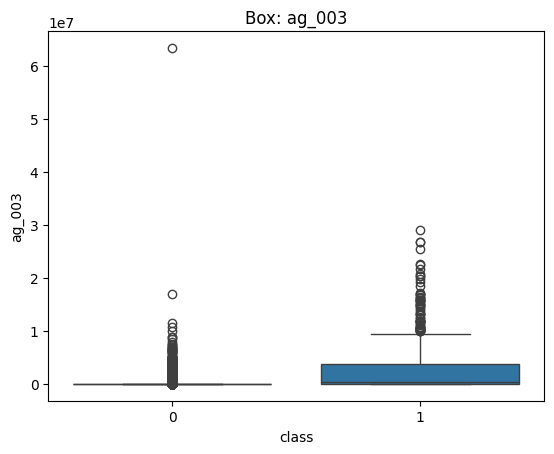

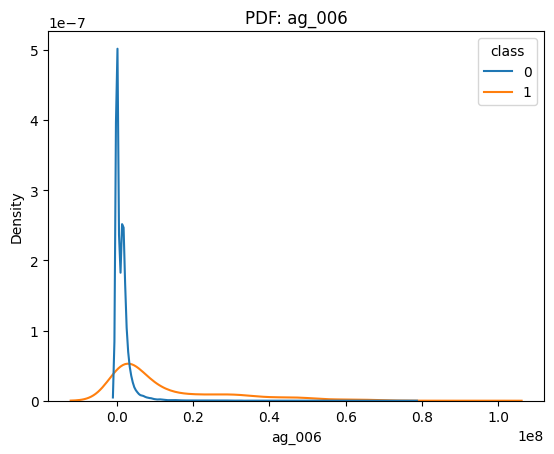

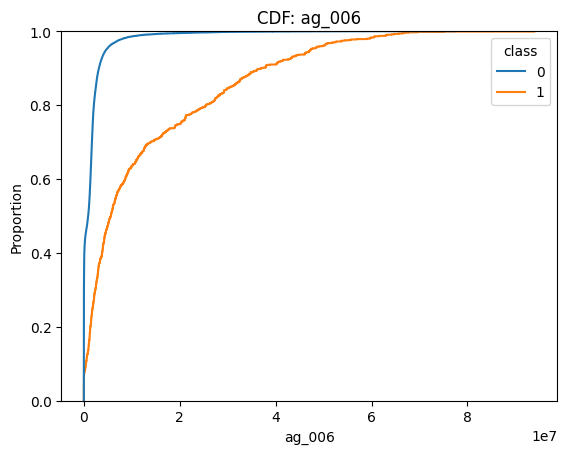

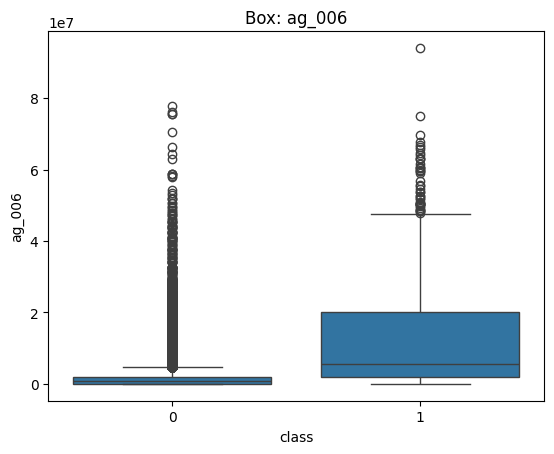

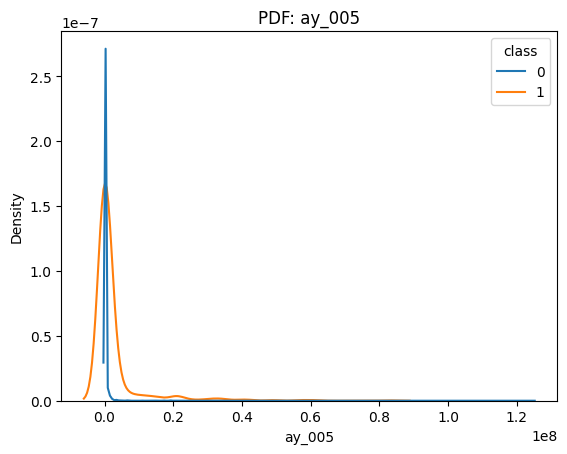

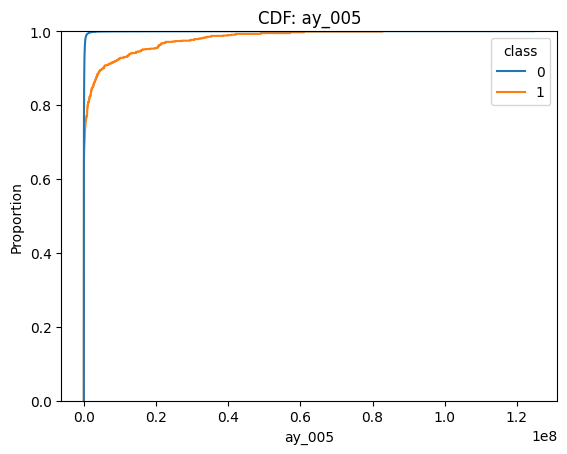

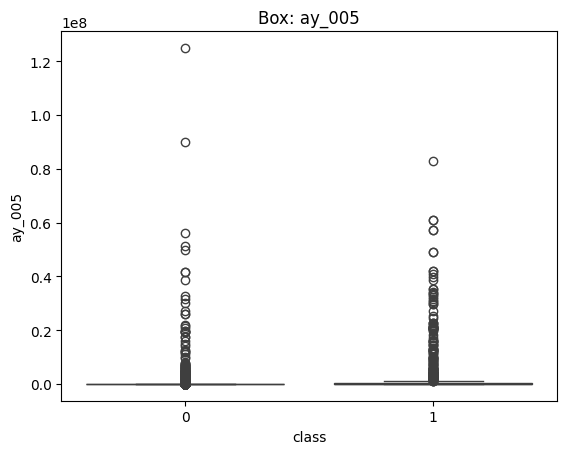

In [25]:
for c in top15_hist[:5]:
    sns.kdeplot(data=train_work, x=c, hue="class", common_norm=False); plt.title(f"PDF: {c}"); plt.show()
    sns.ecdfplot(data=train_work, x=c, hue="class"); plt.title(f"CDF: {c}"); plt.show()
    sns.boxplot(data=train_work, x="class", y=c); plt.title(f"Box: {c}"); plt.show()


# I.VII Feature Reduction

In [26]:
from datetime import datetime
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, _tree
from warnings import simplefilter
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.style

# GLOBAL VARIABLES
RANDOM_NUMBER=42
TEST_SIZE_ASSIGNED = 0.20

In [28]:
def select_feature_dtc(X, Y):
    # get selector.threshold_
    selector = SelectFromModel(estimator=RandomForestClassifier(random_state=RANDOM_NUMBER)).fit(X, Y)
    print(f'selector.threshold_ = {selector.threshold_}')

    feature_name = X.columns[selector.get_support()]
    print(f'Number of selected features = {feature_name.shape[0]}')

    # put it into a data frame
    d = {'columns': X.columns.tolist(),  'support':selector.get_support()}
    df = pd.DataFrame(data=d)
    df = df[df.support ==True]
    df.reset_index(inplace = True, drop=True)
    print(f'Shape of Df = {df.shape}')
    return df, feature_name
best_feature,feature_name = select_feature_dtc(X_all, y_all)
print(f"Selected Features: {feature_name}")
X_dim = X_all[feature_name]
print("Reduced Dimension")
X_dim

selector.threshold_ = 0.006134969325153374
Number of selected features = 48
Shape of Df = (48, 2)
Selected Features: Index(['aa_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_006', 'ah_000',
       'ai_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000',
       'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_001', 'az_002',
       'ba_000', 'ba_004', 'ba_005', 'bb_000', 'bg_000', 'bh_000', 'bi_000',
       'bj_000', 'bk_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000',
       'ci_000', 'ck_000', 'cn_000', 'cn_001', 'cn_003', 'cn_004', 'cq_000',
       'cs_002', 'dn_000', 'ee_000', 'ee_004', 'ee_005', 'ee_007'],
      dtype='object')
Reduced Dimension


,aa_000,ag_001,ag_002,ag_003,ag_004,ag_006,ah_000,ai_000,al_000,am_0,...,cn_001,cn_003,cn_004,cq_000,cs_002,dn_000,ee_000,ee_004,ee_005,ee_007
0,76698,0.0,0.0,0.0,37250.0,3664156.0,2551696.0,0.0,0.0,0.0,...,0.0,118196.0,1309472.0,6700214.0,267998.0,62282.0,965866.0,721044.0,469792.0,157956.0
1,33058,0.0,0.0,0.0,18254.0,1720800.0,1393352.0,0.0,0.0,0.0,...,0.0,98644.0,1179502.0,3646660.0,164860.0,33736.0,664504.0,293306.0,245416.0,81140.0
2,41040,0.0,0.0,0.0,1648.0,1883374.0,1234132.0,0.0,0.0,0.0,...,0.0,33276.0,1215280.0,2673338.0,56362.0,13876.0,262032.0,423992.0,409564.0,158022.0
3,12,0.0,0.0,318.0,2212.0,1872.0,2668.0,0.0,642.0,3894.0,...,52.0,1894.0,2170.0,21614.0,24.0,232.0,5670.0,58.0,44.0,0.0
4,60874,0.0,0.0,0.0,43752.0,1800340.0,1974038.0,0.0,0.0,0.0,...,0.0,378910.0,2497104.0,4289260.0,80950.0,44946.0,404740.0,405298.0,347188.0,311560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.0,0.0,2564.0,59100.0,6015982.0,4880368.0,0.0,1224.0,2114.0,...,860.0,404890.0,3156012.0,10845228.0,138036.0,62846.0,1608808.0,1290398.0,1218244.0,717762.0
59996,2286,0.0,0.0,0.0,104.0,36564.0,56982.0,0.0,0.0,0.0,...,0.0,61572.0,63554.0,147638.0,3606.0,1066.0,13934.0,21126.0,68424.0,0.0
59997,112,0.0,0.0,0.0,28.0,11538.0,8784.0,0.0,0.0,0.0,...,0.0,3956.0,14690.0,43738.0,72.0,622.0,15876.0,452.0,144.0,2622.0
59998,80292,0.0,0.0,0.0,330.0,3251010.0,2634394.0,0.0,0.0,0.0,...,0.0,11460.0,760936.0,6159728.0,333922.0,79230.0,1180714.0,347378.0,225724.0,165070.0


# I.IV Scaling & Stratified Split

In [31]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
target = "class"

X_train, X_val, y_train, y_val = train_test_split(
    X_dim, y_all,
    test_size=0.2,
    stratify=y_all,
    random_state=RANDOM_STATE
)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
print(f"Class ratio (train): {y_train.mean():.4f}, (val): {y_val.mean():.4f}")

Train shape: (46501, 48), Validation shape: (11626, 48)
Class ratio (train): 0.0160, (val): 0.0160


# II.I Baseline Models

We’ll test **Logistic Regression, Random Forest, and LightGBM**, all run fast. 

Then we evaluate ROC-AUC and Expected cost.

We search for thresholds to minimize cost; also doing a 5-fold stratified CV Cost.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np, pandas as pd

def evaluate_model(model, X_tr, y_tr, X_val, y_val, name="Model", cost_fp=10, cost_fn=500):
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    total_cost = fp*cost_fp + fn*cost_fn
    print(f"\n {name} ")
    print(f"AUC: {auc:.3f}")
    print(f"FP={fp}, FN={fn}, Cost={total_cost}")
    print(classification_report(y_val, y_pred, digits=3))
    return dict(model=name, auc=auc, cost=total_cost, fp=fp, fn=fn)

results = []

In [33]:
logreg = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
results.append(evaluate_model(logreg, X_train, y_train, X_val, y_val, "Logistic Regression"))


 Logistic Regression 
AUC: 0.832
FP=126, FN=87, Cost=44760
              precision    recall  f1-score   support

           0      0.992     0.989     0.991     11440
           1      0.440     0.532     0.482       186

    accuracy                          0.982     11626
   macro avg      0.716     0.761     0.736     11626
weighted avg      0.984     0.982     0.983     11626



In [34]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, y_train)
results.append(evaluate_model(rf, X_train, y_train, X_val, y_val, "Random Forest"))


 Random Forest 
AUC: 0.991
FP=21, FN=60, Cost=30210
              precision    recall  f1-score   support

           0      0.995     0.998     0.996     11440
           1      0.857     0.677     0.757       186

    accuracy                          0.993     11626
   macro avg      0.926     0.838     0.877     11626
weighted avg      0.993     0.993     0.993     11626



In [35]:
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=RANDOM_STATE)
lgbm.fit(X_train, y_train)
results.append(evaluate_model(lgbm, X_train, y_train, X_val, y_val, "LightGBM"))

[LightGBM] [Info] Number of positive: 743, number of negative: 45758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12045
[LightGBM] [Info] Number of data points in the train set: 46501, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015978 -> initscore=-4.120426
[LightGBM] [Info] Start training from score -4.120426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [36]:
pd.DataFrame(results)

,model,auc,cost,fp,fn
0,Logistic Regression,0.831519,44760,126,87
1,Random Forest,0.990908,30210,21,60
2,LightGBM,0.992916,21150,15,42


The LightGBM performs best among parametric models tested.

**Why?**

- When we have Tabular + sparse & skewed features, tree ensembles like LightGBM shine. They are non-linear, robust to scale, handle wide ranges and monotonic relations. 

- Our feature filtering reduced noise; ensembles still model complex boundaries.

***Note***: The LightGBM “no further splits” warnings are common under extreme class skew and conservative split constraints. We can ease constraints later: min_data_in_leaf, num_leaves, feature_fraction


# II.II Cost-Tuned Threshold

Now we sweep the threshold to find the minimum-cost operating point.

In [37]:
from sklearn.metrics import roc_curve

def tune_threshold(model, X_val, y_val, cost_fp=10, cost_fn=500):
    prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thr = roc_curve(y_val, prob)
    # cost = FP*cost_fp + FN*cost_fn
    fp = fpr * (1 - y_val.mean()) * len(y_val)
    fn = (1 - tpr) * y_val.mean() * len(y_val)
    costs = fp*cost_fp + fn*cost_fn
    best_idx = np.argmin(costs)
    best_thr = thr[best_idx]
    print(f"Best threshold: {best_thr:.3f}, Expected cost: {costs[best_idx]:.1f}")
    return best_thr, pd.DataFrame({"threshold": thr, "cost": costs})

In [38]:
best_thr_lr, cost_lr = tune_threshold(logreg, X_val, y_val)
best_thr_rf, cost_rf = tune_threshold(rf, X_val, y_val)
best_thr_lgbm, cost_lgbm = tune_threshold(lgbm, X_val, y_val)


Best threshold: 0.074, Expected cost: 34860.0
Best threshold: 0.015, Expected cost: 8380.0
Best threshold: 0.004, Expected cost: 6520.0


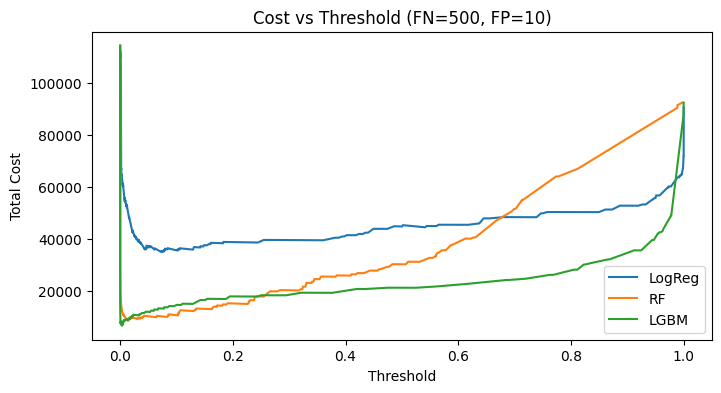

In [39]:
# Compare visually
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(cost_lr["threshold"], cost_lr["cost"], label="LogReg")
plt.plot(cost_rf["threshold"], cost_rf["cost"], label="RF")
plt.plot(cost_lgbm["threshold"], cost_lgbm["cost"], label="LGBM")
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.legend()
plt.title("Cost vs Threshold (FN=500, FP=10)")
plt.show()


In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

def cv_cost(
    model, X, y, *,
    cost_fp=10, cost_fn=500, folds=5, random_state=42,
    sampler=None,        # pass e.g. SMOTE(sampling_strategy=0.1, random_state=42)
    verbose=True
):
    y = np.asarray(y).ravel()
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=random_state)

    aucs, best_costs, best_thresholds = [], [], []

    for tr_idx, va_idx in skf.split(X, y):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        # optional resampling in-train only
        if sampler is not None:
            X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)

        model.fit(X_tr, y_tr)
        prob = model.predict_proba(X_va)[:, 1]

        aucs.append(roc_auc_score(y_va, prob))

        fpr, tpr, thr = roc_curve(y_va, prob)
        P = (y_va == 1).sum()
        N = (y_va == 0).sum()
        FP = fpr * N
        FN = (1 - tpr) * P
        costs = cost_fp * FP + cost_fn * FN

        best_idx = np.argmin(costs)
        best_costs.append(costs[best_idx])
        best_thresholds.append(thr[best_idx])

    if verbose:
        print(f"Mean AUC = {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")
        print(f"Mean Cost = {np.mean(best_costs):.1f} ± {np.std(best_costs):.1f}")
        print(f"Best thresholds per fold: {[round(t, 4) for t in best_thresholds]}")

    return {
        "aucs": aucs,
        "best_costs": best_costs,
        "best_thresholds": best_thresholds,
        "mean_auc": float(np.mean(aucs)),
        "mean_cost": float(np.mean(best_costs)),
    }


In [55]:
_ = cv_cost(lgbm, X_dim, y_all, cost_fp=10, cost_fn=500, folds=5)


[LightGBM] [Info] Number of positive: 743, number of negative: 45758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12057
[LightGBM] [Info] Number of data points in the train set: 46501, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015978 -> initscore=-4.120426
[LightGBM] [Info] Start training from score -4.120426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [56]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, classification_report

def evaluate_on_test(model, X_train, y_train, X_test, y_test, best_threshold=None):
    """
    Fits model on full training data and evaluates on test data.
    If best_threshold is provided, apply it to probabilities for cost-aware classification.
    """
    model.fit(X_train, y_train)
    prob = model.predict_proba(X_test)[:, 1]
    
    auc = roc_auc_score(y_test, prob)
    print(f"\n[Test Evaluation] AUC = {auc:.3f}")

    if best_threshold is None:
        best_threshold = 0.5  # default
    y_pred = (prob >= best_threshold).astype(int)

    print(f"Threshold = {best_threshold:.3f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    
    # Optional: compute cost
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = 10 * fp + 500 * fn
    print(f"Total cost = {cost:.1f} (FP={fp}, FN={fn})")
    
    f1_macro = f1_score(y_test, y_pred, average="macro")
    return {"AUC": auc, "Macro-F1": f1_macro, "Cost": cost, "Threshold": best_threshold}

In [57]:
# Step 2 — Take median best threshold from folds
best_thr = np.median(_["best_thresholds"])

# Step 3 — Final test-set evaluation
final_metrics = evaluate_on_test(lgbm, X_all, y_all, x_test_pp, y_test, best_threshold=best_thr)
print(final_metrics)

[LightGBM] [Info] Number of positive: 929, number of negative: 57198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38193
[LightGBM] [Info] Number of data points in the train set: 58127, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015982 -> initscore=-4.120165
[LightGBM] [Info] Start training from score -4.120165

[Test Evaluation] AUC = 0.995
Threshold = 0.003
[[15247   378]
 [   10   365]]
              precision    recall  f1-score   support

           0      0.999     0.976     0.987     15625
           1      0.491     0.973     0.653       375

    accuracy                          0.976     16000
   macro avg      0.745     0.975     0.820     16000
weighted avg      0.987     0.976     0.980     16000

Total cost = 8780.0 (FP=378, FN=10)
{'AUC': 0.9954696533333334, 'Macro-F1': 0.8201938731757411, 'Co

- **Cost-sensitive decision thresholding** aligns model usage with business risk: heavy FN penalty pushes threshold down.
- **Stable CV shows generalization:** small variance in AUC and cost across folds.

# III Addressing Label Imbalance

The models (especially tree ensembles) already handle imbalance decently, but class imbalance still affects:

- how the model learns decision boundaries,

- how it estimates probabilities, and

- how stable cross-validation thresholds are.


### III.I Weighted Learning

In [43]:
logreg_weighted = LogisticRegression(class_weight={0:1, 1:59}, max_iter=500, solver='lbfgs')
rf_weighted     = RandomForestClassifier(class_weight={0:1, 1:59}, n_estimators=300, random_state=42)

In [44]:
_ = cv_cost(logreg, X_dim, y_all, cost_fp=10, cost_fn=500)

Mean AUC = 0.855 ± 0.011
Mean Cost = 33076.0 ± 2698.9
Best thresholds per fold: [0.0602, 0.0461, 0.0714, 0.0504, 0.0712]


Linear model underfits in this highly skewed dataset.

In [45]:
_ = cv_cost(logreg_weighted, X_dim, y_all, cost_fp=10, cost_fn=500)


Mean AUC = 0.964 ± 0.007
Mean Cost = 12138.0 ± 1147.5
Best thresholds per fold: [0.6747, 0.4474, 0.6108, 0.5298, 0.4041]


Reweighting fixed class prior mismatch and improved separation.

In [46]:
_ = cv_cost(rf, X_dim, y_all, cost_fp=10, cost_fn=500)

Mean AUC = 0.986 ± 0.004
Mean Cost = 8548.0 ± 1057.5
Best thresholds per fold: [0.1338, 0.0171, 0.0096, 0.0376, 0.043]


Already very strong.

In [ ]:
_ = cv_cost(rf_weighted, X_dim, y_all, cost_fp=10, cost_fn=500)

KeyboardInterrupt: 

Small cost win (~12% better), big runtime hit.

In [58]:
from lightgbm import LGBMClassifier

# weight = N_neg / N_pos ≈ 59 
lgbm_weighted = LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    min_data_in_leaf=50,
    scale_pos_weight=59,     # try 20–40 grid if you like
    random_state=RANDOM_NUMBER,
    n_jobs=-1
)

In [59]:
_ = cv_cost(lgbm_weighted, X_dim, y_all, cost_fp=10, cost_fn=500)


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 743, number of negative: 45758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12057
[LightGBM] [Info] Number of data points in the train set: 46501, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015978 -> initscore=-4.120426
[LightGBM] [Info] Start training from score -4.120426
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning

In [60]:
best_thr = np.median(_["best_thresholds"])

final_metrics = evaluate_on_test(lgbm_weighted, X_all, y_all, x_test_pp, y_test, best_threshold=best_thr)
print(final_metrics)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 929, number of negative: 57198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38185
[LightGBM] [Info] Number of data points in the train set: 58127, number of used features: 161
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015982 -> initscore=-4.120165
[LightGBM] [Info] Start training from score -4.120165
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50

[Test Evaluation] AUC = 0.996
Threshold = 0.000
[[15269   356]
 [   14   361]]
              precision    recall  f1-score   support

     

Slightly worse cost than just using cost-tuned thresholds. It seems that for tree ensembles, moderate weighting or even no weighting + cost-tuned threshold often suffices.

### III.II Sampling Approaches

In [49]:
import sklearn, imblearn
print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)


scikit-learn: 1.4.2
imbalanced-learn: 0.12.3


If we find true categoricals -> SMOTE-NC gets categorical indices and continuous features.

If not → we automatically switch to standard SMOTE on float64 arrays, so there’s no attempt to cast synthetic floats back to int64.

In [50]:
from imblearn.over_sampling import SMOTENC, SMOTE

def make_sampler(X_dim, pos_ratio=0.10, random_state=RANDOM_NUMBER):
    return SMOTE(
            sampling_strategy=pos_ratio,
            random_state=random_state,
            k_neighbors=5,
        )

In [51]:
sampler = make_sampler(X_dim, pos_ratio=0.10, random_state=RANDOM_NUMBER)

In [52]:
cat_cols = []
for c in X_dim.columns:
    vals = X_dim[c].dropna().unique()
    if len(vals) <= 5 or set(vals).issubset({0, 1}):
        cat_cols.append(c)

cat_idx = [X_dim.columns.get_loc(c) for c in cat_cols]

# 2) Ensure numeric dtypes without Pandas "Int64" (nullable)
#    -> use standard numpy dtypes: int64 for categoricals, float64 for continuous
cont_cols = [c for c in X_dim.columns if c not in cat_cols]

X_dim_fixed = X_dim.copy()
# Avoid pandas *nullable* integer dtypes; use numpy dtypes
X_dim_fixed[cont_cols] = X_dim_fixed[cont_cols].astype('float64')
if len(cat_cols) > 0:
    X_dim_fixed[cat_cols]  = X_dim_fixed[cat_cols].astype('int64')

# Ensure y is standard int
Y_fixed = pd.Series(np.asarray(y_all).ravel(), name='target').astype('int64')


In [53]:
_ = cv_cost(lgbm,X_dim_fixed, Y_fixed, sampler=sampler, cost_fp=10, cost_fn=500, folds=5, random_state=RANDOM_NUMBER)

[LightGBM] [Info] Number of positive: 4575, number of negative: 45758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 50333, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090895 -> initscore=-2.302760
[LightGBM] [Info] Start training from score -2.302760
[LightGBM] [Info] Number of positive: 4575, number of negative: 45758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 50333, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090895 -> initscore=-2.302760
[LightGBM] [Info] Start training from score -2.302760
[LightGBM] [

In [54]:
# Inspect how many positives per fold to keep k_neighbors safe (>= k+1)
# (With ~800 pos overall, ~160 per fold; k=5 is fine.)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for _, va_idx in skf.split(X_dim_fixed, Y_fixed):
    print("Positives in fold:", int(Y_fixed.iloc[va_idx].sum()))


Positives in fold: 186
Positives in fold: 186
Positives in fold: 185
Positives in fold: 186
Positives in fold: 186


# IV.I Root Cause Analysis & Explainability